In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
s=pd.read_csv('/content/drive/MyDrive/AMA/50_Startups.csv')
s.head()




,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [40]:
s.nunique()

,0
R&D Spend,49
Administration,50
Marketing Spend,48
State,3
Profit,50


In [41]:
s.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [42]:
s.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


Outliers in R&D Spend:
Series([], Name: R&D Spend, dtype: float64)

Outliers in Administration:
Series([], Name: Administration, dtype: float64)

Outliers in Marketing Spend:
Series([], Name: Marketing Spend, dtype: float64)

Outliers in Profit:
49    14681.4
Name: Profit, dtype: float64



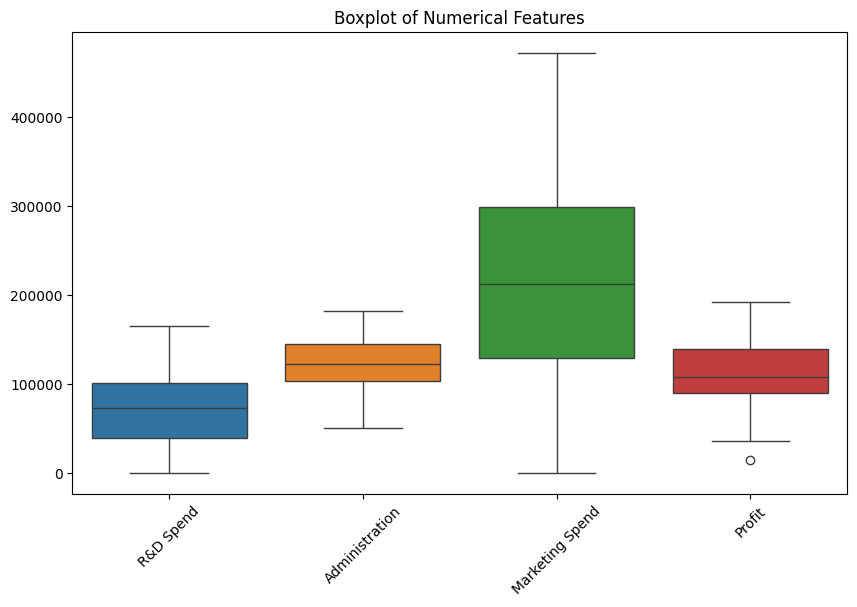

In [43]:
# prompt: identify outliers in the above data

# Identify outliers using IQR method
def find_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))]
    return outliers

# Apply the function to numerical columns
numerical_cols = s.select_dtypes(include=np.number).columns
for col in numerical_cols:
    outliers = find_outliers_IQR(s[col])
    print(f"Outliers in {col}:\n{outliers}\n")

# Visualization of outliers using boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=s[numerical_cols])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [44]:
# prompt: remove the outlier and print the dataset

# Remove outliers based on IQR method
def remove_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

# Apply the function to remove outliers from the DataFrame
s1 = remove_outliers_IQR(s[numerical_cols])

# Print the DataFrame without outliers
s1

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [45]:
# prompt: in s1, add the column State

# Assuming 's' is your original dataframe and 's1' is the dataframe without outliers
# and that 'State' is a column in the original dataframe 's'

s1['State'] = s.loc[s1.index, 'State'].values
s1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State
0,165349.20,136897.80,471784.10,192261.83,New York
1,162597.70,151377.59,443898.53,191792.06,California
2,153441.51,101145.55,407934.54,191050.39,Florida
3,144372.41,118671.85,383199.62,182901.99,New York
4,142107.34,91391.77,366168.42,166187.94,Florida


In [46]:
category=s1.select_dtypes(include=['object']).columns.tolist()
continuous=s1.select_dtypes(exclude=['object']).columns.tolist()
print("Categorical variable:")
print(category)
print("Continuous variable:")
print(continuous)

Categorical variable:
['State']
Continuous variable:
['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']


R&D Spend
Skew: 0.16


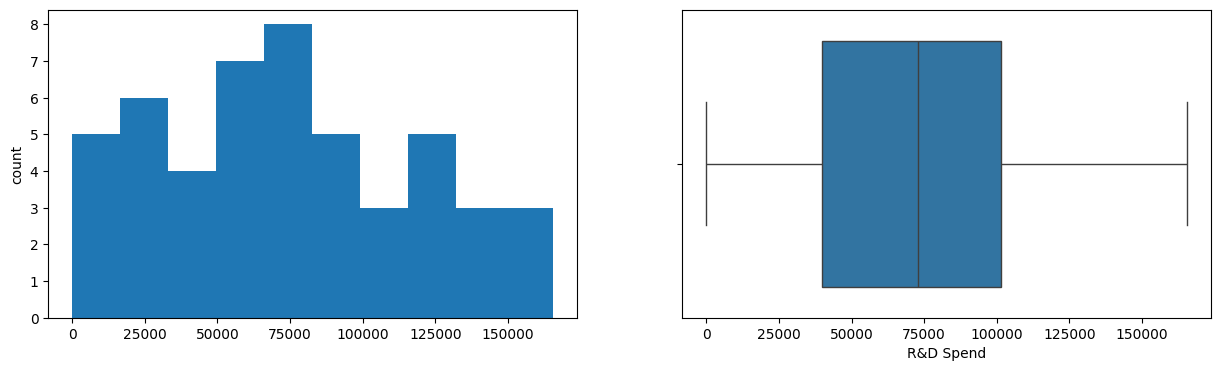

Administration
Skew: -0.49


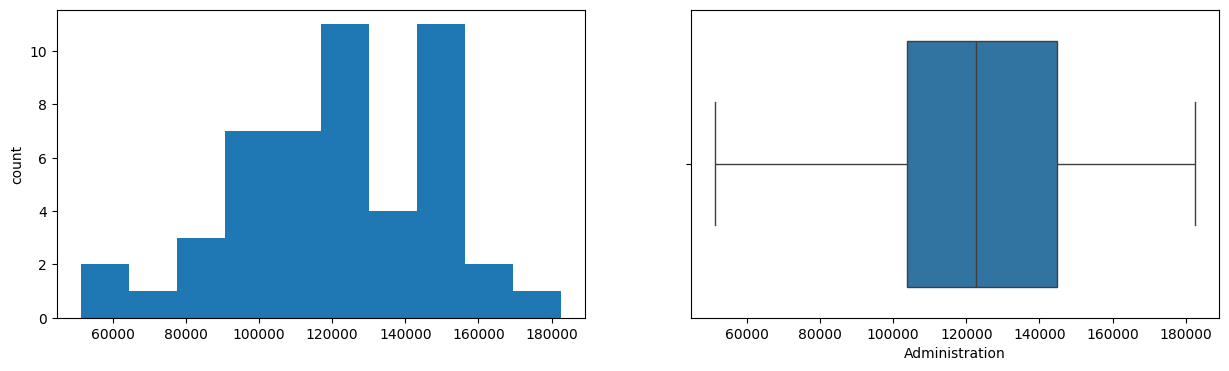

Marketing Spend
Skew: -0.05


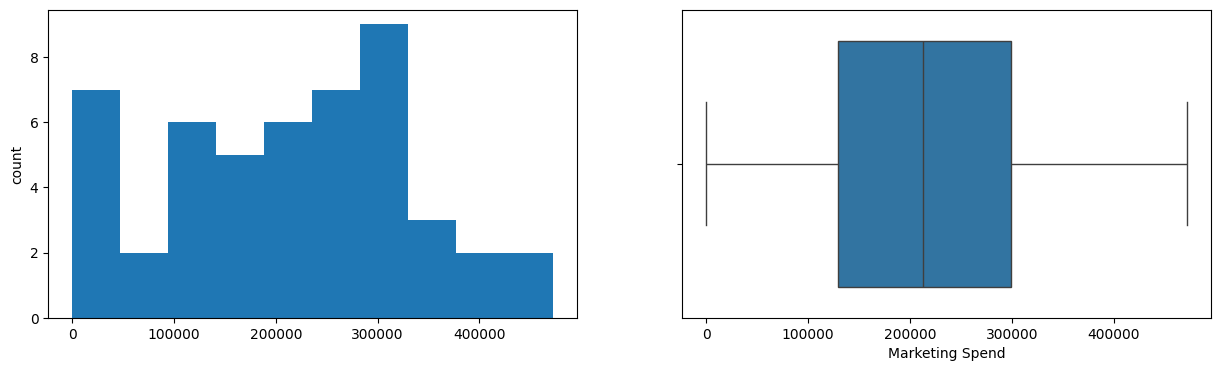

Profit
Skew: 0.02


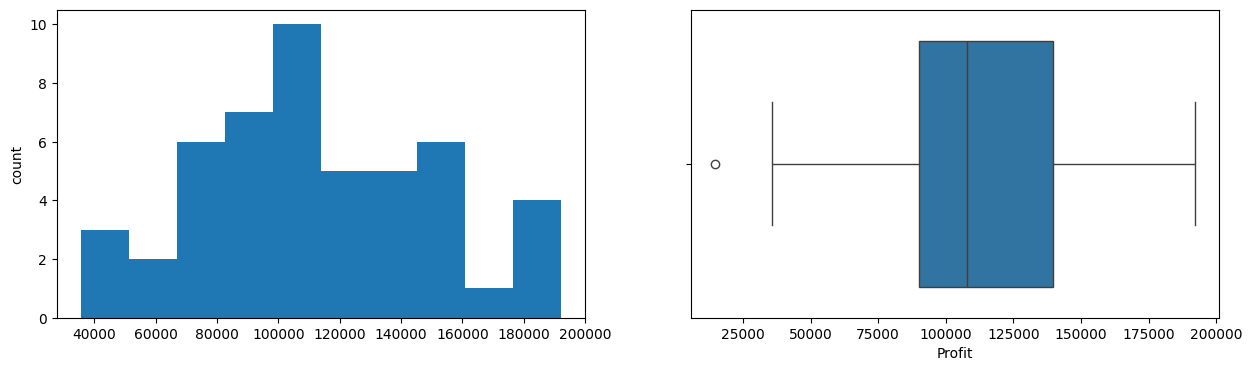

In [47]:
for col in continuous:
  print(col)
  print('Skew:', round(s[col].skew(),2))
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  s1[col].hist(grid=False)
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(x=s[col])
  plt.show()

In [48]:
# prompt: label state into 1,2,3

# Assuming 'State' is the column you want to label
# and it has values like 'New York', 'California', etc.

# Create a mapping dictionary
state_mapping = {
    'New York': 1,
    'California': 2,
    'Florida': 3
}

# Use the map function to create a new column with labels
s1['State_Label'] = s1['State'].map(state_mapping)

# Display the updated dataframe
print(s1.head())

   R&D Spend  Administration  Marketing Spend     Profit       State  \
0  165349.20       136897.80        471784.10  192261.83    New York   
1  162597.70       151377.59        443898.53  191792.06  California   
2  153441.51       101145.55        407934.54  191050.39     Florida   
3  144372.41       118671.85        383199.62  182901.99    New York   
4  142107.34        91391.77        366168.42  166187.94     Florida   

   State_Label  
0            1  
1            2  
2            3  
3            1  
4            3  


In [49]:
s1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State,State_Label
0,165349.20,136897.80,471784.10,192261.83,New York,1
1,162597.70,151377.59,443898.53,191792.06,California,2
2,153441.51,101145.55,407934.54,191050.39,Florida,3
3,144372.41,118671.85,383199.62,182901.99,New York,1
4,142107.34,91391.77,366168.42,166187.94,Florida,3


                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.243438         0.711654  0.978437
Administration    0.243438        1.000000        -0.037280  0.205841
Marketing Spend   0.711654       -0.037280         1.000000  0.739307
Profit            0.978437        0.205841         0.739307  1.000000


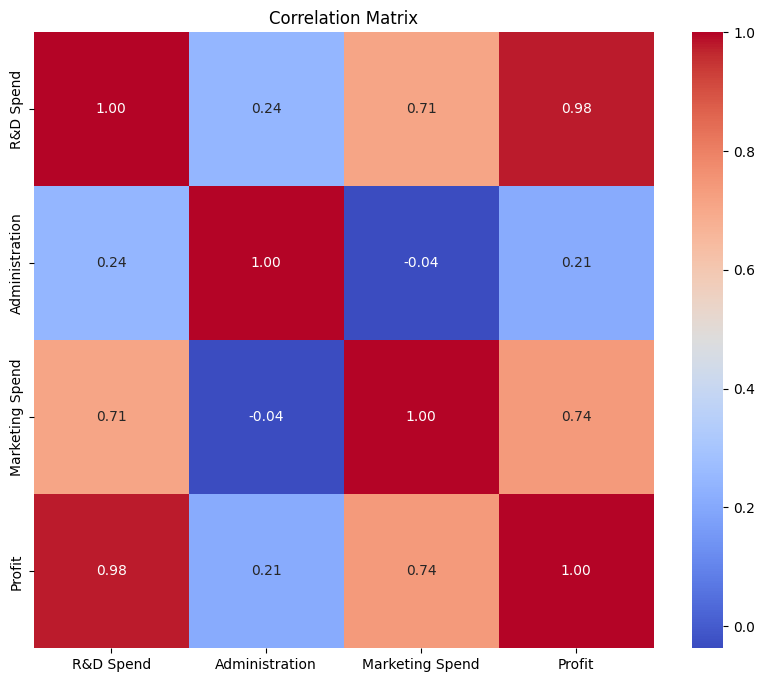

In [50]:
# prompt: correlation matrix for the above data except State, include state label

# Assuming 's' is your DataFrame and 'State_Label' is the new column

# Select numerical columns excluding 'State' and include 'State_Label'
numerical_cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',]
correlation_matrix = s1[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**R&D Spend and Profit**

In [51]:
X = s1[["R&D Spend"]]
y = s1["Profit"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
lr = LinearRegression()
lr.fit(X_train.values,y_train)

LinearRegression()

In [54]:
y_pred = lr.predict(X_test)
r2_score( y_test, y_pred)

0.9403835003089829

In [75]:
mse = mean_squared_error(y_test, y_pred)
mse


788731710.5054868

In [55]:
# prompt: print the entire equation

print("Profit = ", lr.coef_[0], "* R&D Spend + ", lr.intercept_)

Profit =  0.825525238644716 * R&D Spend +  52367.98547027777


In [56]:
lr.predict(X[0:10])

array([188867.92325999, 186596.49056586, 179037.82463103, 171551.05368924,
       169681.18123694, 161235.6948145 , 163496.44521205, 159932.38033349,
       151878.87806011, 154184.0417155 ])

**Marketing spend & profit**

In [57]:
X = s1[["Marketing Spend"]]
y = s1["Profit"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
lr = LinearRegression()
lr.fit(X_train.values,y_train)

LinearRegression()

In [60]:
y_pred = lr.predict(X_test)
r2_score( y_test, y_pred)

0.02790055149637316

In [83]:
import pickle
with open('SLmodel.pkl','wb') as f:
    pickle.dump(lr,f)

In [84]:
with open('SLmodel.pkl', 'rb') as f:
    clf2 = pickle.load(f)

**Multiple Regression**


In [61]:
# prompt: convert state into dummy variable

# Assuming 's1' is your DataFrame and 'State' is the column to convert

# Use pandas' get_dummies function
s1 = pd.get_dummies(s1, columns=['State'], prefix='State')

# Display the updated DataFrame
print(s1.head())


   R&D Spend  Administration  Marketing Spend     Profit  State_Label  \
0  165349.20       136897.80        471784.10  192261.83            1   
1  162597.70       151377.59        443898.53  191792.06            2   
2  153441.51       101145.55        407934.54  191050.39            3   
3  144372.41       118671.85        383199.62  182901.99            1   
4  142107.34        91391.77        366168.42  166187.94            3   

   State_California  State_Florida  State_New York  
0             False          False            True  
1              True          False           False  
2             False           True           False  
3             False          False            True  
4             False           True           False  


In [62]:
X1 = s1[['R&D Spend', 'Administration', 'Marketing Spend','State_California','State_Florida','State_New York']]  # Use double square brackets
y1 = s1['Profit']

In [63]:
X1 = X1.values
y1 = y1.values

In [64]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [65]:
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X1_train, y1_train)

y_pred_multiple = model_multiple.predict(X1_test)

mse_multiple = mean_squared_error(y1_test, y_pred_multiple)
r2_multiple = r2_score(y1_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 65657273.7653
  R² Score: 0.9191


In [66]:
# prompt: print the entire equation

print("Profit =", model_multiple.intercept_, end="")
for i in range(len(model_multiple.coef_)):
  print(f" + ({model_multiple.coef_[i]}) * X{i}", end="")

Profit = 49727.18102612578 + (0.7619290446680327) * X0 + (-0.014730602057590723) * X1 + (0.039977430364332) * X2 + (1579.5779700658995) * X3 + (-281.2999466407749) * X4 + (-1298.2780234251243) * X5

In [67]:
lr.predict(X[0:10])

array([181645.04967245, 174138.95567487, 164458.35422157, 157800.33595109,
       153215.96532171, 152325.78795701,  89030.79272262, 141832.09273953,
       138531.09663047, 136746.01788254])

In [68]:
predictions = pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred_multiple})
print(predictions.head())

      Actual      Predicted
0  134307.35  129503.403513
1   64926.08   47438.272494
2   42559.73   49311.838930
3   65200.33   67056.984899
4  125370.37  129710.457195


In [78]:
import pickle
with open('SMmodel.pkl','wb') as f:
    pickle.dump(model_multiple,f)

In [79]:
with open('SMmodel.pkl', 'rb') as f:
    clf2 = pickle.load(f)